In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('meal_data.csv')

# Feature engineering
data['DayOfWeek'] = data['Day'].astype('category').cat.codes
data['Holiday'] = data['Holiday'].map({'Yes': 1, 'No': 0})

# Prepare features and target
X = data[['DayOfWeek', 'Holiday', 'Meal']]
X = pd.get_dummies(X, columns=['Meal'], drop_first=True)  # One-hot encoding
y = data['Time']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))

# Visualize predictions
plt.scatter(y_test, predictions)
plt.xlabel('Actual Meal Times')
plt.ylabel('Predicted Meal Times')
plt.title('Actual vs Predicted Meal Times')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'meal_data.csv'

Mean Absolute Error: 1.44866857142857


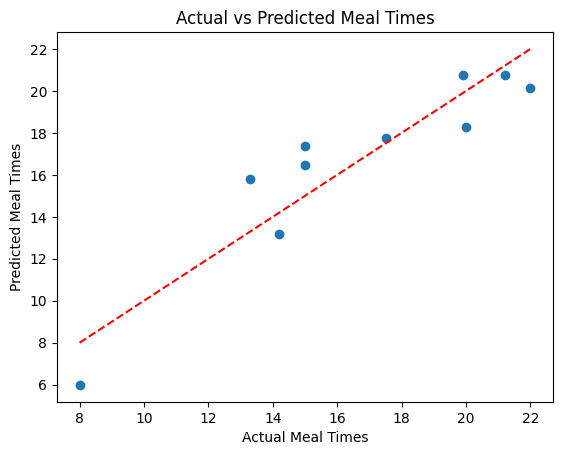

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'Date': [26, 26, 26, 26, 27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29,
             30, 30, 30, 30, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3,
             4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7],
    'Day': ['Monday', 'Monday', 'Monday', 'Monday',
            'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
            'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
            'Friday', 'Friday', 'Friday', 'Friday',
            'Saturday', 'Saturday', 'Saturday', 'Saturday',
            'Sunday', 'Sunday', 'Sunday', 'Sunday',
            'Monday', 'Monday', 'Monday', 'Monday',
            'Tuesday', 'Tuesday', 'Tuesday', 'Tuesday',
            'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
            'Friday', 'Friday', 'Friday', 'Friday',
            'Saturday', 'Saturday', 'Saturday', 'Saturday',
            'Sunday', 'Sunday', 'Sunday', 'Sunday'],
    'Holiday': ['No', 'No', 'No', 'No',
                'No', 'No', 'No', 'No',
                'No', 'No', 'No', 'No',
                'No', 'No', 'No', 'No',
                'Yes', 'Yes', 'Yes', 'Yes',
                'Yes', 'Yes', 'Yes', 'Yes',
                'Yes', 'Yes', 'Yes', 'Yes',
                'No', 'No', 'No', 'No',
                'No', 'No', 'No', 'No',
                'No', 'No', 'No', 'No',
                'No', 'Yes', 'Yes', 'Yes',
                'Yes', 'Yes', 'Yes', 'Yes'],
    'Meal': ['Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner',
             'Breakfast', 'Lunch', 'Tea', 'Dinner'],
    'Time': [13.9, 17, 5.9, 20.2,
             14.2, 20, 6, 18.2,
             12, 23, 6.5, 20.9,
             15, 17.9, 5, 18,
             18, 20, 6.2, 19.9,
             13.3, 19, 7, 21,
             15, 20, 8, 22,
             13, 15, 6, 21,
             15, 20, 6, 21,
             18.3, 17.5, 5.3, 19.9,
             13.3, 18.2, 6.2, 21.2,
             15.2, 18, 7, 21]
}

# Load data into DataFrame
df = pd.DataFrame(data)

# Feature Engineering
df['DayOfWeek'] = df['Day'].astype('category').cat.codes  # Encode days
df['Holiday'] = df['Holiday'].map({'Yes': 1, 'No': 0})  # Convert Holiday to binary

# One-hot encoding for Meal
df = pd.get_dummies(df, columns=['Meal'], drop_first=True)

# Prepare features and target variable
X = df[['DayOfWeek', 'Holiday'] + [col for col in df.columns if 'Meal_' in col]]
y = df['Time']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

# Visualize actual vs predicted meal times
plt.scatter(y_test, predictions)
plt.xlabel('Actual Meal Times')
plt.ylabel('Predicted Meal Times')
plt.title('Actual vs Predicted Meal Times')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
df = pd.read_csv('/content/large_mess_data.csv')

# Preview the data
print(df.head())

# 1. Handle missing values (if any)
# Check for missing values
print(df.isnull().sum())

# Since the dataset is generated, we shouldn't have missing values. If there are any, let's fill or drop them:
df = df.dropna()  # Dropping any missing rows

# 2. Feature engineering
# Convert 'time' into separate hour and minute columns
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour
df['minute'] = pd.to_datetime(df['time'], format='%H:%M').dt.minute

# Drop the original 'time' column as it's now split
df = df.drop('time', axis=1)

# Encode categorical variables into numeric representations
label_encoder = LabelEncoder()

df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])  # Monday = 0, Sunday = 6
df['meal_type'] = label_encoder.fit_transform(df['meal_type'])      # breakfast, lunch, dinner -> 0, 1, 2
df['weather'] = label_encoder.fit_transform(df['weather'])          # sunny, cloudy, rainy, snowy -> 0, 1, 2, 3
df['event'] = label_encoder.fit_transform(df['event'])              # normal, sports_day, etc.

# 3. Feature scaling (only for numeric features like waiting_time)
scaler = StandardScaler()

df['waiting_time_scaled'] = scaler.fit_transform(df[['waiting_time']])

# We can drop the original waiting_time if we prefer the scaled version
df = df.drop('waiting_time', axis=1)

# 4. Split the data into training and testing sets
# Define feature columns and target column
X = df.drop(['date', 'waiting_time_scaled'], axis=1)  # Features (dropping date column for now)
y = df['waiting_time_scaled']  # Target (scaled waiting time)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preview the preprocessed data
print("Training features:\n", X_train.head())
print("Training target:\n", y_train.head())


         date   time day_of_week  meal_type  waiting_time weather  \
0  2024-01-01  18:23    Thursday     dinner            37  cloudy   
1  2024-01-01  18:00   Wednesday      lunch            13   sunny   
2  2024-01-01  16:00      Friday  breakfast            31   sunny   
3  2024-01-01  15:29     Tuesday  breakfast             9   sunny   
4  2024-01-01  13:59     Tuesday  breakfast            41  cloudy   

           event  
0        holiday  
1  cultural_fest  
2         normal  
3        holiday  
4         normal  
date            0
time            0
day_of_week     0
meal_type       0
waiting_time    0
weather         0
event           0
dtype: int64
Training features:
         day_of_week  meal_type  weather  event  hour  minute
566853            6          2        3      1    11      34
382311            5          0        3      0    20      23
241519            4          1        1      0    16      48
719220            2          2        0      0    20       7
905718 

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Train the model on the training data
model.fit(X_train, y_train)

# 3. Make predictions on the test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")

# Optional: Feature importance
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f'Feature: {X_train.columns[i]}, Importance: {v:.2f}')

# Predict a new sample (e.g., predicting for lunch on a sunny Tuesday)
new_data = [[12, 30, 1, 2, 0, 1]]  # hour, minute, day_of_week, meal_type, weather, event
predicted_wait_time = model.predict(new_data)
print(f"Predicted Waiting Time: {predicted_wait_time[0]:.2f} minutes")


Mean Absolute Error (MAE): 0.95 minutes
Root Mean Squared Error (RMSE): 1.14 minutes
Feature: day_of_week, Importance: 0.15
Feature: meal_type, Importance: 0.10
Feature: weather, Importance: 0.13
Feature: event, Importance: 0.13
Feature: hour, Importance: 0.21
Feature: minute, Importance: 0.28
Predicted Waiting Time: -0.05 minutes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and model performance
best_rf = grid_search.best_estimator_
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model
y_pred_best = best_rf.predict(X_test)
best_mae = mean_absolute_error(y_test, y_pred_best)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))

print(f"Best Model MAE: {best_mae:.2f}")
print(f"Best Model RMSE: {best_rmse:.2f}")


In [ ]:
from flask import Flask, request, jsonify
import joblib

# Load the trained model (save your model using joblib)
model = joblib.load('best_rf_model.pkl')  # Save after training using joblib.dump(best_rf, 'best_rf_model.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data in JSON format
    data = request.get_json()
    features = [data['hour'], data['minute'], data['day_of_week'], data['meal_type'], data['weather'], data['event']]

    # Make prediction
    prediction = model.predict([features])

    return jsonify({'predicted_waiting_time': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True)


In [ ]:
!pip install streamlit


In [ ]:
import streamlit as st
import joblib

# Load model
model = joblib.load('best_rf_model.pkl')

st.title("Meal Waiting Time Prediction")

# User inputs
hour = st.slider('Hour', 6, 21)
minute = st.slider('Minute', 0, 59)
day_of_week = st.selectbox('Day of Week', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
meal_type = st.selectbox('Meal Type', ['Breakfast', 'Lunch', 'Dinner'])
weather = st.selectbox('Weather', ['Sunny', 'Cloudy', 'Rainy', 'Snowy'])
event = st.selectbox('Event', ['Normal', 'Sports Day', 'Cultural Fest', 'Holiday'])

# Make prediction
if st.button('Predict'):
    input_data = [[hour, minute, day_of_week, meal_type, weather, event]]
    prediction = model.predict(input_data)
    st.write(f'Predicted Waiting Time: {prediction[0]:.2f} minutes')
